## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Get the data
We’ll use the California Housing dataset from sklearn.

In [2]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Visualization
We'll create some plots to better understand feature relationships.

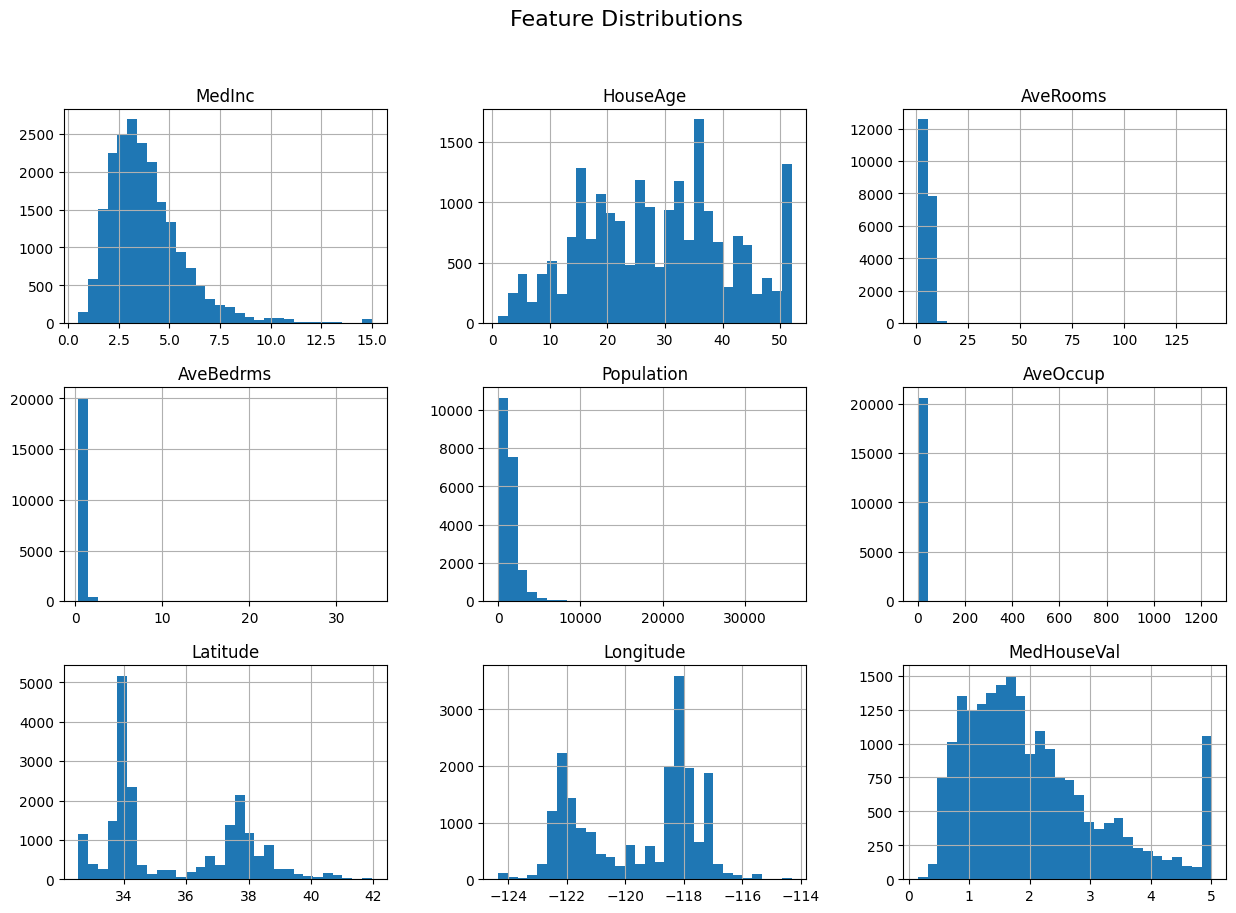

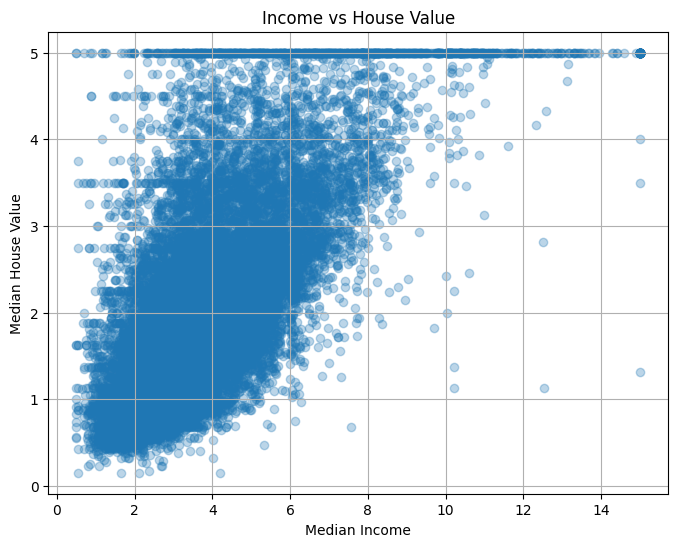

In [3]:
# Histograms
df.hist(bins=30, figsize=(15,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Scatter plot for MedInc vs MedHouseVal
plt.figure(figsize=(8, 6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income vs House Value")
plt.grid(True)
plt.show()

## Explore the data
Let’s look at some basic statistics and a few visualizations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


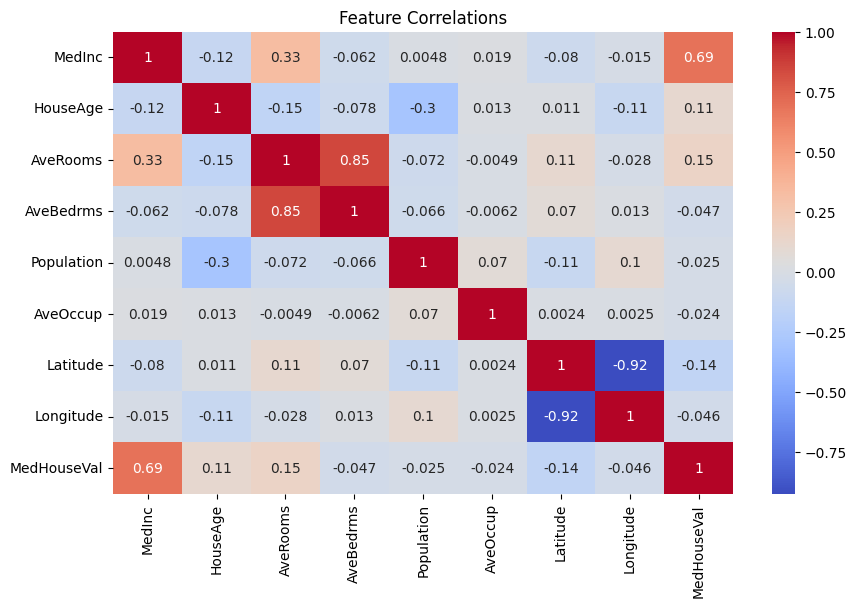

In [4]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

## Split the data into training and test sets
We’ll use 80% for training and 20% for testing.

In [5]:
X = df.drop("MedHouseVal", axis=1)  # Features
y = df["MedHouseVal"]               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocess the data
We’ll scale the features using StandardScaler to standardize them.

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train a simple model
We’ll use Linear Regression for this basic example.

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## 🧪 Step 6.1: Cross-Validation
We'll evaluate our model using 5-fold cross-validation.

In [8]:
from sklearn.model_selection import cross_val_score

# Use cross_val_score with negative MSE (we'll convert to RMSE)
scores = cross_val_score(model, X_train_scaled, y_train,
                         scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Cross-Validation RMSE scores: [0.72115555 0.70872616 0.7214877  0.71266905 0.73859747]
Mean: 0.7205271873526422
Standard deviation: 0.010284620997322667


## 📈 Step 7: Evaluate the model
Check how well the model performs on both train and test data.

In [9]:
# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R² Score:", r2_score(y_test, y_test_pred))

Train RMSE: 0.7196757085831575
Test RMSE: 0.7455813830127763
R² Score: 0.575787706032451


## 🔮 Step 8: Make predictions with new data
We’ll use the first few rows from the test set as an example.

In [10]:
# Pick some new data to predict
sample_data = X_test.iloc[:5]
sample_data_scaled = scaler.transform(sample_data)

# Predict
predictions = model.predict(sample_data_scaled)
print("Predictions:", predictions)

Predictions: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


## 🤖 Step 9: Model Comparison
Let's compare Linear Regression with other models like Decision Tree and Random Forest.

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train,
                             scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    print(f"{name} - Mean RMSE: {rmse_scores.mean():.3f}, Std: {rmse_scores.std():.3f}")

Linear Regression - Mean RMSE: 0.721, Std: 0.010
Decision Tree - Mean RMSE: 0.724, Std: 0.020
Random Forest - Mean RMSE: 0.511, Std: 0.004


## 🔧 Step 10: Hyperparameter Tuning
We'll use GridSearchCV to find the best hyperparameters for Random Forest.

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None]
}

# Initialize GridSearch
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
final_model = grid_search.best_estimator_

c:\Users\mennatallahmustafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mennatallahmustafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mennatallahmustafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\mennatallahmustafa\AppData\Local\Program

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


✅ 1. Save the Trained Model

In [18]:
import joblib

# Save the model
joblib.dump(final_model, "house_price_model.pkl")


['house_price_model.pkl']